In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
df[["Glucose", "BloodPressure", "SkinThickness","Insulin","BMI"]]=df[["Glucose", "BloodPressure", "SkinThickness","Insulin","BMI"]].replace(0,np.nan)

In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
df["Glucose"].fillna(df["Glucose"].mean(), inplace=True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace=True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace=True)
df["Insulin"].fillna(df["Insulin"].median(), inplace=True)
df["BMI"].fillna(df["BMI"].median(), inplace=True)


C:\Users\goex1\AppData\Local\Temp\ipykernel_7696\2329853200.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Glucose"].fillna(df["Glucose"].mean(), inplace=True)
C:\Users\goex1\AppData\Local\Temp\ipykernel_7696\2329853200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [29]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

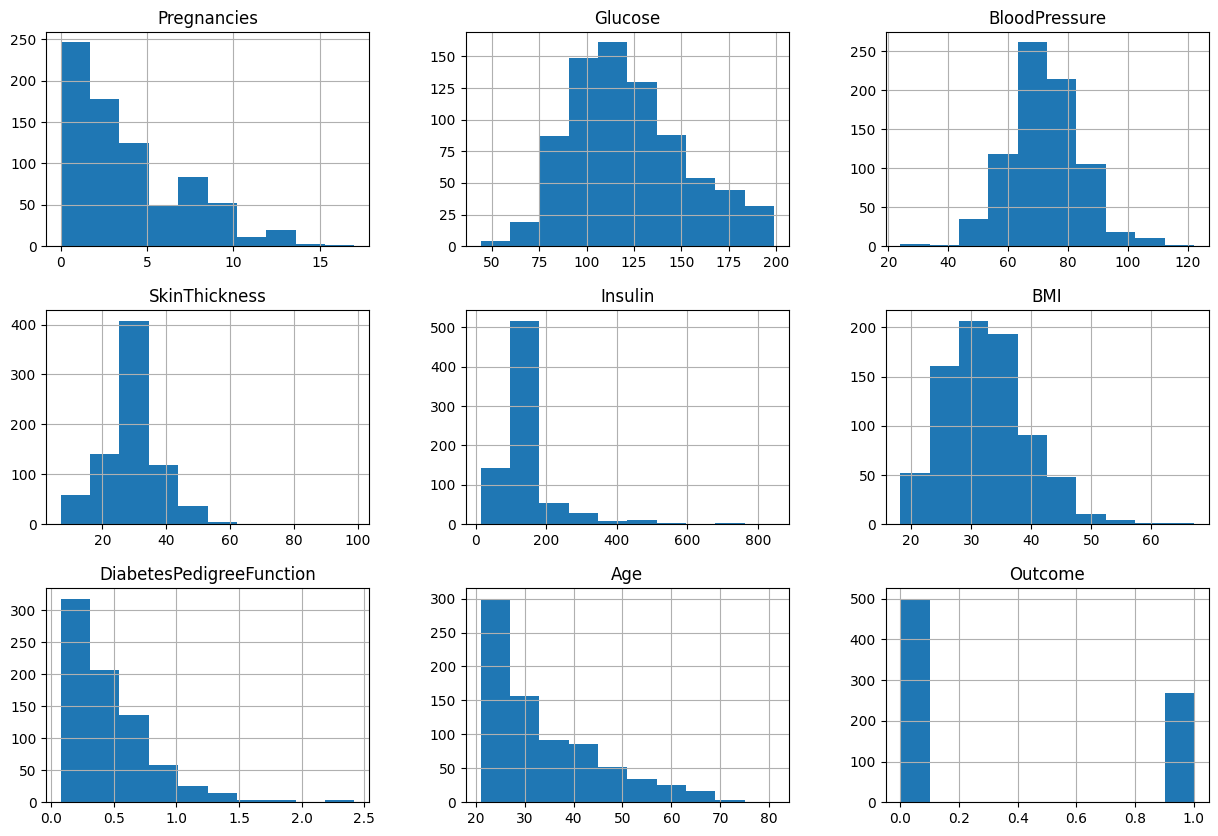

In [31]:
hist=df.hist(figsize=(15,10))

<Axes: xlabel='Outcome', ylabel='count'>

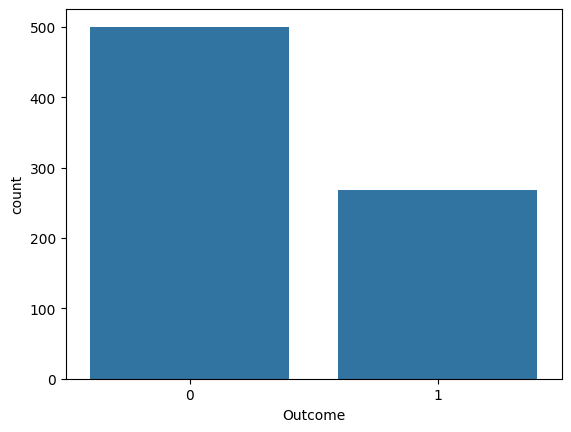

In [33]:
sns.countplot(data=df, x="Outcome")

<Axes: >

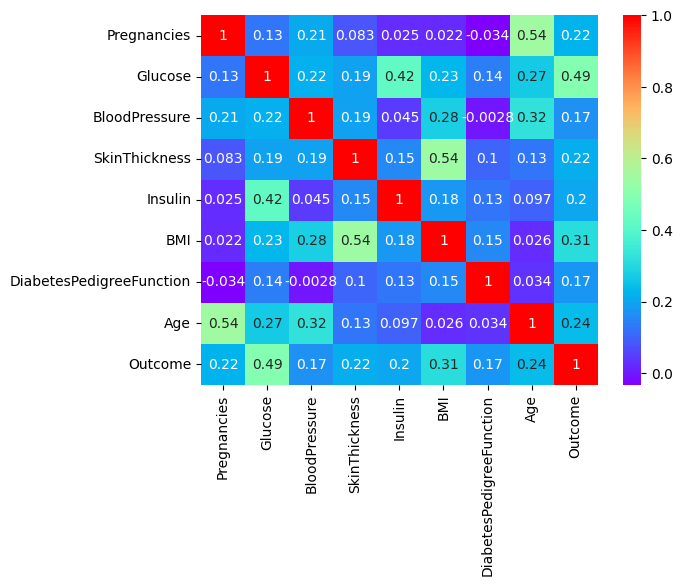

In [36]:
sns.heatmap(df.corr(), annot=True, cmap="rainbow")

In [42]:
from sklearn.preprocessing import StandardScaler

X=df.drop("Outcome", axis=1)

y=df["Outcome"]

print(X)

print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0       35.00000    125.0  33.6   
1              1     85.0           66.0       29.00000    125.0  26.6   
2              8    183.0           64.0       29.15342    125.0  23.3   
3              1     89.0           66.0       23.00000     94.0  28.1   
4              0    137.0           40.0       35.00000    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0       48.00000    180.0  32.9   
764            2    122.0           70.0       27.00000    125.0  36.8   
765            5    121.0           72.0       23.00000    112.0  26.2   
766            1    126.0           60.0       29.15342    125.0  30.1   
767            1     93.0           70.0       31.00000    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [44]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [49]:
scaler=StandardScaler()

scaler.fit(X)

X=scaler.transform(X)

print(X)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]


In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=42)

In [56]:
X_train
X_test

array([[ 6.39947260e-01, -7.78756694e-01, -1.19164676e+00, ...,
         2.24837617e-01, -1.26471402e-01,  8.30381132e-01],
       [-5.47918591e-01, -3.18474560e-01,  2.14652158e-01, ...,
         4.72265123e-01, -9.78144869e-01, -1.04154944e+00],
       [-5.47918591e-01, -4.49983741e-01, -6.95305964e-01, ...,
        -2.40908276e-01, -9.47943682e-01, -1.04154944e+00],
       ...,
       [-8.44885053e-01, -1.31834595e-16,  1.31928692e-01, ...,
        -6.92099611e-01, -5.22106949e-01, -1.04154944e+00],
       [ 1.23388019e+00,  7.00721594e-01, -5.29859033e-01, ...,
         3.55828650e-01, -1.03552712e+00,  6.60205626e-01],
       [-5.47918591e-01, -6.80124808e-01, -1.19164676e+00, ...,
        -1.20150918e+00,  4.29230435e-01, -8.71373930e-01]],
      shape=(254, 8))

Text(0, 0.5, 'Fehlerwert')

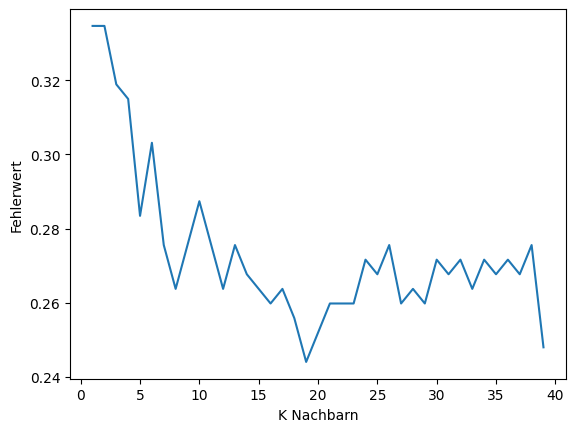

In [64]:
from sklearn.neighbors import KNeighborsClassifier

fehler=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    predictions_k=knn.predict(X_test)
    fehler.append(np.mean(predictions_k!=y_test))

plt.plot(range(1,40), fehler)
plt.xlabel("K Nachbarn")
plt.ylabel("Fehlerwert")

In [74]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
fehler.append(np.mean(predictions_k!=y_test))


prediction

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [75]:
from sklearn.metrics import confusion_matrix, classification_report


print(confusion_matrix(y_test,prediction))

print(classification_report(y_test, prediction))

[[144  24]
 [ 38  48]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       168
           1       0.67      0.56      0.61        86

    accuracy                           0.76       254
   macro avg       0.73      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



In [80]:
from sklearn.linear_model import LogisticRegression

lm=LogisticRegression()

lm.fit(X_train,y_train)

predictions_lm=lm.predict(X_test)

print(classification_report(y_test, predictions_lm))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       168
           1       0.63      0.58      0.61        86

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.74      0.74      0.74       254

